In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
flight_data = pd.read_csv('Clean_Dataset.csv')
print(flight_data.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [3]:
flight_data.shape

(300153, 12)

In [4]:
flight_data.drop('Unnamed: 0',axis=1,inplace=True)
flight_data.drop('flight', axis=1, inplace=True)

In [5]:
flight_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
print(flight_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB
None


In [7]:
for col in flight_data.columns:
  print(col, ':',flight_data[col].nunique())

airline : 6
source_city : 6
departure_time : 6
stops : 3
arrival_time : 6
destination_city : 6
class : 2
duration : 476
days_left : 49
price : 12157


In [8]:
print(flight_data.describe())

            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


In [9]:
print('Null values in each columns')
print(flight_data.isnull().sum())

Null values in each columns
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [10]:
print('Total null values in dataset :', flight_data.isnull().sum().sum())

Total null values in dataset : 0


In [11]:
print('Total duplicates in a dataset :', flight_data.duplicated().sum())

Total duplicates in a dataset : 2213


In [12]:
for col in flight_data.columns:
  if flight_data[col].dtype == 'object':
    le = LabelEncoder()
    flight_data[col] = le.fit_transform(flight_data[col])
    print(col, le.classes_)

airline ['AirAsia' 'Air_India' 'GO_FIRST' 'Indigo' 'SpiceJet' 'Vistara']
source_city ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
departure_time ['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']
stops ['one' 'two_or_more' 'zero']
arrival_time ['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']
destination_city ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
class ['Business' 'Economy']


In [13]:
flight_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [14]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int32  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 14.9 MB


In [15]:
flight_data.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


In [16]:
def remove_outliers_iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower) & (df[col] <= upper)]
        after = df.shape[0]
        print(f" Removed {before - after} outliers from '{col}'")
    return df

flight_data = remove_outliers_iqr(flight_data)

 Removed 0 outliers from 'airline'
 Removed 0 outliers from 'source_city'
 Removed 0 outliers from 'departure_time'
 Removed 49290 outliers from 'stops'
 Removed 0 outliers from 'arrival_time'
 Removed 0 outliers from 'destination_city'
 Removed 0 outliers from 'class'
 Removed 1296 outliers from 'duration'
 Removed 0 outliers from 'days_left'
 Removed 2 outliers from 'price'


In [17]:
sc = StandardScaler()
flight_data_scaled = sc.fit_transform(flight_data)
flight_data_scaled = pd.DataFrame(flight_data_scaled, columns=flight_data.columns)

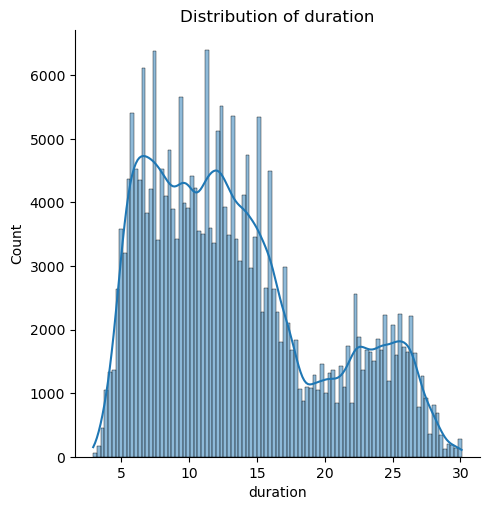

In [18]:
cols_to_visualize_dist = ['duration']
cols_to_visualize_count = ['airline', 'source_city', 'stops', 'class']

for col in cols_to_visualize_dist:
  sns.displot(flight_data[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

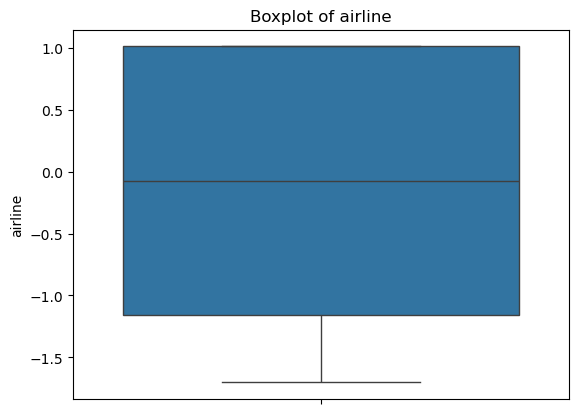

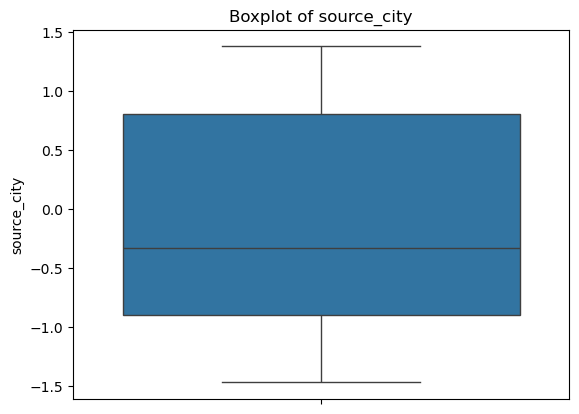

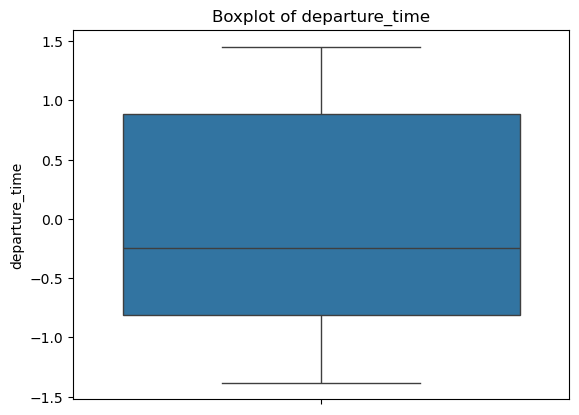

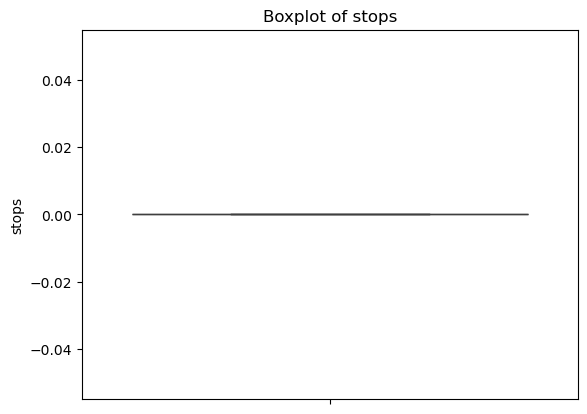

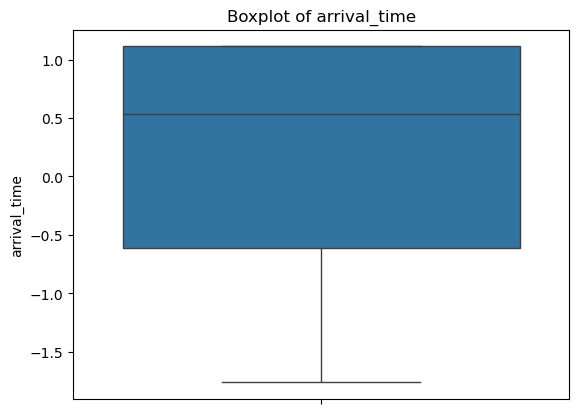

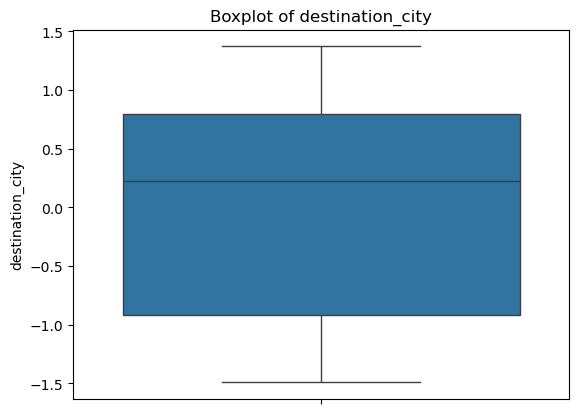

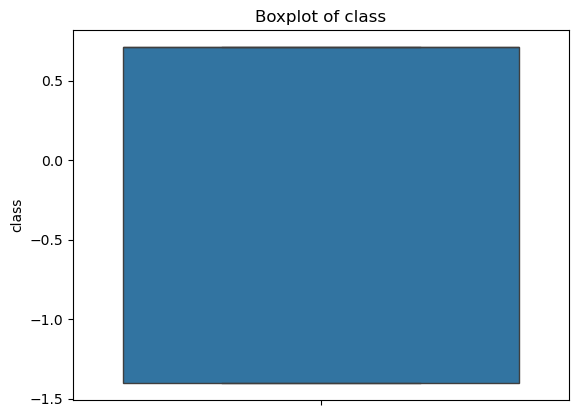

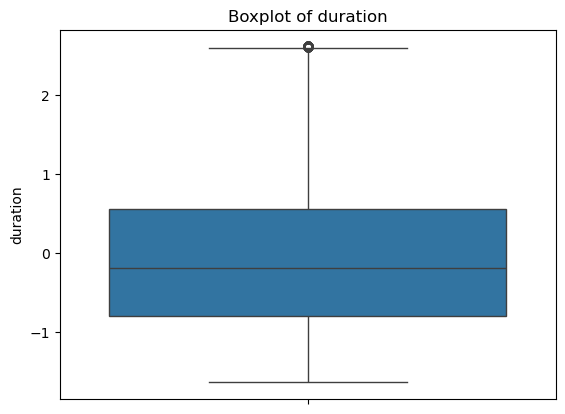

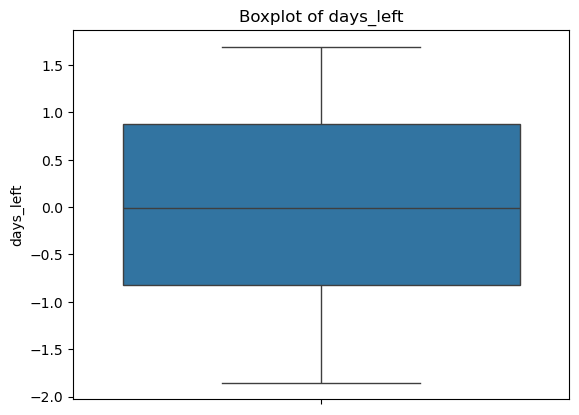

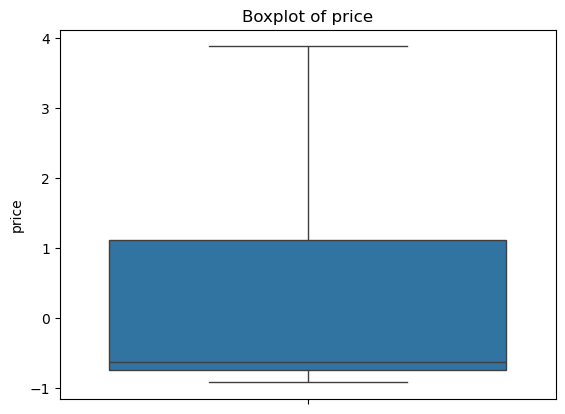

In [19]:
for col in flight_data_scaled:
  sns.boxplot(flight_data_scaled[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [20]:
X = flight_data_scaled.drop('price', axis=1)
y = flight_data_scaled['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔹 Model: {name}")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))


🔹 Model: Linear Regression
MAE : 0.1741592994716645
MSE : 0.0723450406961763
RMSE: 0.2689703342307034
R² Score: 0.9284276126625128

🔹 Model: Random Forest
MAE : 0.10579624255143091
MSE : 0.03445196461821182
RMSE: 0.18561240426817335
R² Score: 0.9659159863279697

🔹 Model: Decision Tree
MAE : 0.11017119507602614
MSE : 0.03749918917132535
RMSE: 0.1936470737484183
R² Score: 0.9629013064836985

🔹 Model: XGBoost
MAE : 0.11554963084367614
MSE : 0.03786193222641132
RMSE: 0.19458142826696315
R² Score: 0.9625424375661783


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))

result_df = pd.DataFrame(results, columns=['Model', 'R²', 'RMSE'])
result_df.set_index("Model").plot(kind='bar', figsize=(8,5), title="Model Comparison")
plt.ylabel("Score (Higher R², Lower RMSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


tuned_models = {}

# 1. Random Forest
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
tuned_models['Random Forest'] = rf_grid.best_estimator_

# 2. Decision Tree
dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)
tuned_models['Decision Tree'] = dt_grid.best_estimator_

# 3. Ridge Regression (tuned Linear Regression)
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=3, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
tuned_models['Ridge Regression'] = ridge_grid.best_estimator_

# 4. Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=3, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
tuned_models['Lasso Regression'] = lasso_grid.best_estimator_

# 5. XGBoost
xgb_params = {
    'n_estimators': [100, 150],
    'max_depth': [5, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, eval_metric='rmse'), xgb_params, cv=3, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
tuned_models['XGBoost'] = xgb_grid.best_estimator_